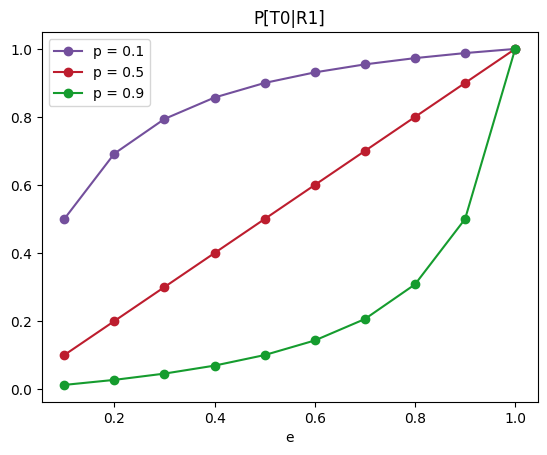

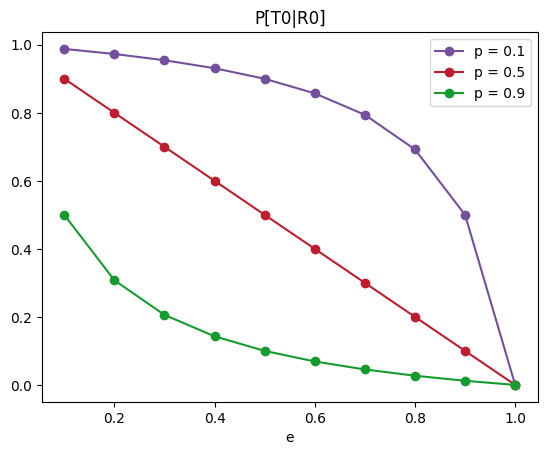

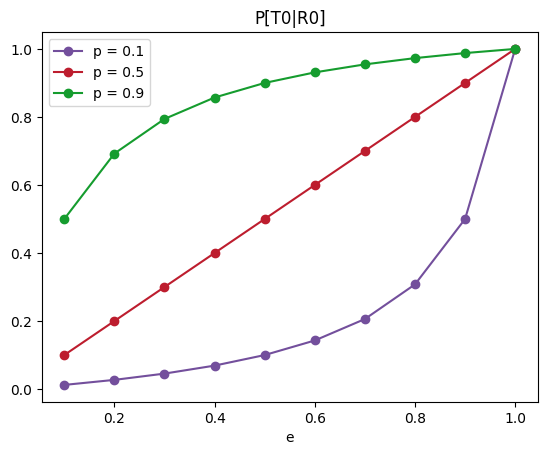

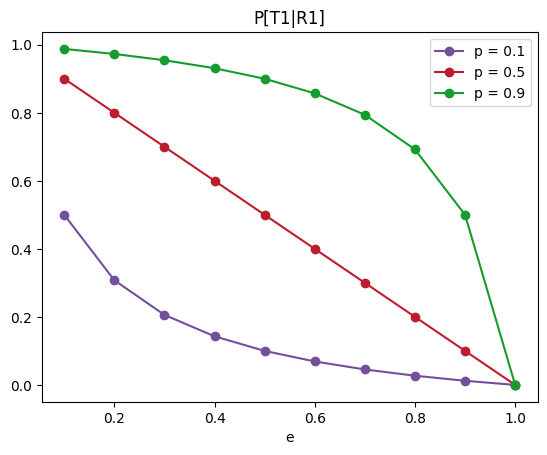

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_conditional_probability(p, e, i, j):
    #validating given probabilities
    if 0 <= p <= 1 and 0 <= e <= 1:
        #ََAssumptions
        p_sending_1 = p
        p_sending_0 = 1 - p
        p_receiving_1_given_sending_0 = e
        p_receiving_0_given_sending_1 = e
        p_receiving_1_given_sending_1 = 1 - e
        p_receiving_0_given_sending_0 = 1 - e

        p_receiving_0 = (
            p_receiving_0_given_sending_0 * p_sending_0 +
            p_receiving_0_given_sending_1 * p_sending_1
        )
        p_receiving_1 = (
            p_receiving_1_given_sending_0 * p_sending_0 +
            p_receiving_1_given_sending_1 * p_sending_1
        )

        #Calculate conditional probabilities in exchange for i=0,1 and j = 0,1 
        p_sending_1_given_receiving_0 = (
            p_receiving_0_given_sending_1 * p_sending_1) / p_receiving_0
        p_sending_0_given_receiving_1 = (
            p_receiving_1_given_sending_0 * p_sending_0) / p_receiving_1
        p_sending_0_given_receiving_0 = (
            p_receiving_0_given_sending_0 * p_sending_0) / p_receiving_0
        p_sending_1_given_receiving_1 = (
            p_receiving_1_given_sending_1 * p_sending_1) / p_receiving_1

        all_conditional_probabilities = [
            [p_sending_0_given_receiving_0,  p_sending_0_given_receiving_1],
            [p_sending_1_given_receiving_0, p_sending_1_given_receiving_1]
        ]
        return all_conditional_probabilities[i][j]
    else:
        return "The value probability must be between 0 and 1"


def drawing_plot(p_sending1, plot_color, i, j):  # Probability of sending 1
    start_point = 0.1
    end_point = 1.1
    step = 0.1
    #determining the range ofprobability of error 
    p_error = np.arange(start_point, end_point, step)
    conditional_probs = [calculate_conditional_probability(
        p=p_sending1, e=error, i=i, j=j) for error in p_error]
    plt.plot(p_error, conditional_probs,
             marker='o', color=plot_color)
    plt.legend(["p = 0.1", "p = 0.5", "p = 0.9" ])
    plt.xlabel("e")
    # plt.ylabel("The probability of sendig 0 knowing that 0 is recived")

def creating_figure():

    # probabilities_title = [ "P[T0|R1]", "P[T0|R0]", "P[T0|R0]", "P[T1|R1]"]
    # assumed_probabilities_value = [0.1, 0.5, 0.9]
    # plot_colors = ["#734f9c", "#bd1d2e", "#159c2e"]

    plt.figure(0)
    plt.title("P[T0|R1]")
    drawing_plot(0.1, "#734f9c", i=0, j=1)
    drawing_plot(0.5, "#bd1d2e", i=0, j=1)
    drawing_plot(0.9, "#159c2e", i=0, j=1)
    plt.figure(1)
    plt.title("P[T0|R0]")
    drawing_plot(0.1, "#734f9c", i=0, j=0)
    drawing_plot(0.5, "#bd1d2e", i=0, j=0)
    drawing_plot(0.9, "#159c2e", i=0, j=0)
    plt.figure(2)
    plt.title("P[T0|R0]")
    drawing_plot(0.1, "#734f9c", i=1, j=0)
    drawing_plot(0.5, "#bd1d2e", i=1, j=0)
    drawing_plot(0.9, "#159c2e", i=1, j=0)
    plt.figure(3)
    plt.title("P[T1|R1]")
    drawing_plot(0.1, "#734f9c", i=1, j=1)
    drawing_plot(0.5, "#bd1d2e", i=1, j=1)
    drawing_plot(0.9, "#159c2e", i=1, j=1)
    
                

creating_figure()